# Sympy experiments


# Sympy playground

In [1]:
import sympy
sympy.init_printing()
import sympy.printing.c as ccode
import sympy.printing.c as codegen

from IPython.display import display, Markdown
from sympy.functions import exp
from sympy import diff
from IPython.display import Latex

## tansig

In [ ]:
phi,z = sympy.symbols(r'\phi z')
phi = 2 / (1 + exp(-2 * z)) - 1
phi

In [ ]:
sympy.simplify(diff(phi))

In [ ]:
sympy.simplify(0.5 * (1 - (phi**2)))

## Biquad transformation 

In [ ]:
s, m,c,d,n,a,b,z,y, T = sympy.symbols("s m c d n a b z y T")

Biquad transfer function

In [ ]:
Hn = m*s**2 + c*s + d
Hd = n*s**2 + a*s + b
H = Hn / Hd
H

Substitute 
$s\rightarrow \frac{2}{T}\cdot\frac{z-1}{z+1}$

In [ ]:
H.subs(s,(2/T)*(z-1)/(z+1))

In [ ]:
sympy.collect(sympy.simplify(sympy.collect(sympy.expand(H.subs(s,(2/T)*(z-1)/(z+1))),z)),z)

rewrite in terms of $z^{-1}$ delay notation and refactoring the time to get it to the format used in SimulC:

$$\frac{
\left( d - 2 c/T + 4 m/T^{2}\right)z^{-2} + 
 \left(2 d - 8 m/ T^{2}\right)z^{-1} + 
\left( d + 2  c/T + 4 m/T^{2}\right) 
}{
\left( b - 2 a/T + 4 n/T^{2}\right)z^{-2} + 
 \left(2  b - 8 n/T^{2}\right)z^{-1} +
\left( b + 2 a/T + 4 n/T^{2}\right) 
}
$$

## FEM solution

In [ ]:
a, b, x, y, x1, x2, x3, x4, y1, y2, y3, y4 = sympy.symbols("a, b, x, y, x_1 x_2 x_3 x_4 y_1 y_2 y_3 y_4")

Solve the set of both equations for a and b


In [ ]:
sols = sympy.solve ([
    (1-a)*(1-b)*x1/4 + (1+a)*(1-b)*x2/4 + (1+a)*(1+b)*x3/4 + (1-a)*(1+b)*x4/4 - x , 
    (1-a)*(1-b)*y1/4 + (1+a)*(1-b)*y2/4 + (1+a)*(1+b)*y3/4 + (1-a)*(1+b)*y4/4 - y
    ] , 
    [a, b]
    )


In [ ]:
print(len(sols), len(sols[0]), len(sols[1]))


## a1

In [ ]:
sympy.simplify(sols[0][0])

## b1

In [ ]:
sympy.simplify(sols[0][1])

## a2

In [ ]:
sympy.simplify(sols[1][0])

## b2

In [ ]:
sympy.simplify(sols[1][1])

In [ ]:
print(sympy.latex(sols[1][0]))

Evaluate at specific point

In [ ]:
subsdic = {
    x1:1.1, y1:0.6,
    x2:2.9,y2:-1.4,
    x3:3.9,y3:3.4,
    x4:1.6,y4:3.4,
    x:3.34,y:0.01
}


In [ ]:
a1 = sols[0][0].subs(subsdic)
b1 = sols[0][1].subs(subsdic)
a2 = sols[1][0].subs(subsdic)
b2 = sols[1][1].subs(subsdic)
print(f'a1={a1}\nb1={b1}\na2={a2}\nb2={b2}')

In [ ]:
print(f'a1={ccode(sols[0][0])}')

In [ ]:
print(f'b1={ccode(sols[0][1])}')

In [ ]:
print(f'a2={ccode(sols[1][0])}')

In [ ]:
print(f'b2={ccode(sols[1][1])}')

# Deriving yaw-pitch-roll Euler angle equations

In [ ]:
# general setup
import sympy
sympy.init_printing()
from sympy.printing.mathml import print_mathml
from IPython.display import display

In [ ]:
# elementary symbols
phi, theta, psi = sympy.symbols(r'\phi \theta \psi')
wx, wy, wz = sympy.symbols(r'\omega_x \omega_y \omega_z')
t = sympy.symbols('t')

In [ ]:
# main variables of interest
def vec(x, y, z): # helper: make a vector
    return sympy.Matrix([[x], [y], [z]])

# angular rate vector
w = vec(wx, wy, wz)

# Euler rate "vector"
dpsi,dtheta,dphi = [sympy.diff(x,t,evaluate=False) for x in [psi,theta,phi]]
deib = vec(dphi, dtheta, dpsi)

In [ ]:
# rotation matrices
s, c = sympy.sin, sympy.cos

def Ephi(phi): return sympy.Matrix([[1,  0,      0],
                                    [0,  c(phi), s(phi)],
                                    [0, -s(phi), c(phi)]])
def Ethe(the): return sympy.Matrix([[c(the), 0, -s(the)],
                                    [0,      1,  0],
                                    [s(the), 0,  c(the)]])
def Epsi(psi): return sympy.Matrix([[ c(psi), s(psi), 0],
                                    [-s(psi), c(psi), 0],
                                    [0,       0,      1]])

In [ ]:
# intermediate frame 2 to body (roll rotation)
H2b = Ephi(phi)
# intermediate frame 1 to frame 1 (pitch rotation)
H12 = Ethe(theta)

# the core equation; each euler rate can be expressed as an angular rate about some axis;
# these sum to the total angular rate, but we must rotate everything to the body axes.
w_sum_deib = vec(dphi, 0, 0) + H2b * vec(0, dtheta, 0) + H2b * H12 * vec(0, 0, dpsi)

display(sympy.Equality(w, w_sum_deib))

In [ ]:
sol = sympy.solve(w - w_sum_deib, deib)
for var in deib:
    display(sympy.Equality(var, sol[var]))

## convert to python functions

    vignet =(np.cos(np.pi*vangl/(2*angles[-1])))**0.1 + 0.09

In [ ]:
import sympy
import numpy as np
from sympy.codegen.ast import Assignment

t, p,v, x,y,s, m,c,d,n,a,b,z,y, T = sympy.symbols("\\theta p v x y s m c d n a b z y T")

y = (sympy.cos(sympy.pi * a / (2. * m)))**p + c
mstr = sympy.latex(y)
subsdic = {c:0.09, p:0.1,m:0.471}
T = y.subs(subsdic)
lstr = sympy.latex(T)

print(mstr)
display(y)
display(T)

In [ ]:
# pstr = sympy.pycode(Assignment(v, T)).replace('math','np')
pstr = sympy.pycode(T).replace('math','np')

print(pstr)
a = np.linspace(0,0.471,100)
eval(pstr)

In [ ]:
import pyradi.ryplot as ryplot
lstr = lstr.replace(r' \pi a ',r' \cdot\pi\cdot \theta ')
print(lstr)
p = ryplot.Plotter(1,1,1,f'${lstr}$',(12,5))
p.plot(1,a,eval(pstr))
                   
                   

## Solve circle 

In [ ]:
# import sympy
# import numpy as np
# from sympy.codegen.ast import Assignment

y1,y2,yc,z1,z2,zc,r = sympy.symbols("y_1,y_2,y_c,z_1,z_2 z_c r")
eqzc = sympy.solve((y1-yc)**2 +(z1-zc)**2-((y2-yc)**2 +(z2-zc)**2),zc)
print('Equation for zc')
display(eqzc[0])
eqr = sympy.solve((y1-yc)**2 +(z1-zc)**2-r**2,r)
print('Equation for r')
display(eqr[1])

print('---------------------------------------')

dicsubs = {y1:1.2,y2:2.5,z1:1.5,z2:2.5,yc:1.1}
zcval = float(eqzc[0].subs(dicsubs))
print(f'z_c = {zcval}')
r = eqr[1].subs(dicsubs).subs({zc:zcval})
print(f'r = {r}')

print('---------------------------------------')
print(sympy.python(eqzc))
print(sympy.python(eqr))


# Quadrilateral and Area 

The objective is to solve the angles for a quadrilateral given the length of the four edges and the area of the polygon.
The process is to divide the quadrilateral into two triangles, writing the area of each of these triangles in terms of the diagonal, then solve for the diagonal length such that the sum of areas of the two triangles adds up to the total area.

Name the four edges of the quadrilateral as $a,b,c,d$ and the line connecting the opposite points as $z$

Heron's formula gives the area, $A$, of a triangle with sides $a, b, z$ as:
$$
A=\sqrt{s(s-a)(s-b)(s-z)} \text { where } s=\frac{1}{2}(a+b+z).
$$

The 



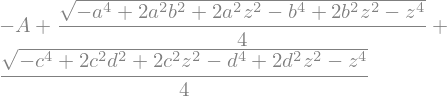

In [18]:
import sympy
import numpy as np


a, b, c, d, z, s1, s2, A1, A2, A = sympy.symbols("a b c d z s_1 s_2 A_1 A_2 A")
s1 = (a+b+z) / 2
eq1 = sympy.sqrt(s1 * (s1-a) * (s1-b) * (s1-z)) - A1
s2 = (c+d+z) / 2
eq2 = sympy.sqrt(s2 * (s2-c) * (s2-d) * (s2-z)) - A2

Az1 = sympy.solve(eq1,A1)
Az2 = sympy.solve(eq2,A2)

Atot = Az1[0]+ Az2[0] - A
display(Atot)

# display(sympy.solve(Atot,z)[-1])


# CJW model
dicV = {a:15.5,b:31.47,c:30,d:25,A:608,'zl':38.9725963248928}

# solve for diagonal, it takes a while
if False:
    Atot = Atot.subs(dicV)
    display(Atot)
    zl = sympy.solve(Atot,z)[-1]
    display(zl)
    


In [19]:
# O, W, S, N = sympy.symbols("O W S N")
def getangle(c,d,zi):
    O = sympy.acos(-(z**2 - c**2 - d**2)/(2*c*d))
    return np.double(180*O.subs([(c,c),(d,c)]).subs([(z,zi)])/np.pi)



W = getangle(dicV[a],dicV[b],dicV['zl'])
O = getangle(dicV[c],dicV[d],dicV['zl'])
N =  getangle(dicV[b],dicV['zl'],dicV[a]) +  getangle(dicV[d],dicV['zl'],dicV[c])
S =  getangle(dicV[a],dicV['zl'],dicV[b]) +  getangle(dicV[c],dicV['zl'],dicV[d])
print(dicV)
print(W)
print(O)
print(N)
print(S)
print(W+O+N+S)

{a: 15.5, b: 31.47, c: 30, d: 25, A: 608, 'zl': 38.9725963248928}
107.18576557315262
89.76559330914885
72.66389596913439
90.38474514856412
360.0


In [24]:
# initial angle from S to O, in deg
sA = 33.849
vpath = [[dicV[c],sA,'O'],[dicV[d],sA+180-O,'N'],[dicV[b],sA+360-O-N,'W'],[dicV[a],sA+540-O-N-W],'S']
print(vpath)

def movev(xi,yi,dist,angle):
    xd = dist * np.cos(np.pi*angle/180)
    yd = dist * np.sin(np.pi*angle/180)
    return xi+xd,yi+yd

x = 10.327
y = 11.081
print(f'S {1000*x:.3f},{1000*y:.3f}')
for segment in vpath:
    x,y = movev(x,y,segment[0],segment[1])
    print(f'{segment[2]} {1000*x:.3f},{1000*y:.3f}')



[[30, 33.849, 'O'], [25, 124.08340669085113, 'N'], [31.47, 231.41951072171673, 'W'], [15.5, 304.23374514856414], 'S']
S 10327.000,11081.000
O 35242.252,27791.182
N 21232.273,48496.749
W 1607.159,23895.615


IndexError: list index out of range